In [64]:
import pandas as pd


df = pd.read_csv('qc_svm_results_3059_2112181321.csv')

In [65]:
df = df.drop(df[df.Model == 'SVM Hybrid'].index, axis=0)

In [67]:
df['Model'].replace('SVM Hybrid B', 'SVM Hybrid', inplace=True)

In [70]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np


COLOR_PALETTE = ['#4878CF', '#6ACC65', '#D65F5F', '#B47CC7', '#C4AD66', '#77BEDB']

def my_plot_(df, metric='f1', ylabel=None, path_save=None, save_format='eps'):
    plt.figure(num=None, figsize=(8, 5), dpi=200, facecolor='w', edgecolor='k')
    for i, model in enumerate(df.Model.unique()):
        data_x = df.train_size[df.Model == model].values
        data_y = df[metric][df.Model == model].values
        plt.plot(data_x, data_y, label=model, color=COLOR_PALETTE[i])
    
    plt.legend()
    plt.xlabel('Tamanho do conjunto de treinamento')
    if ylabel is None:
        plt.ylabel(metric)
    else:
        plt.ylabel(ylabel)
    _max = df['train_size'].max()
    plt.xlim(0, df['train_size'].max())
    plt.xticks([0,df['train_size'].max()/4,(df['train_size'].max()/4)*2,(df['train_size'].max()/4)*3,_max])
    if path_save is not None:
        plt.savefig(path_save, dpi=100, format=save_format)
    plt.show()

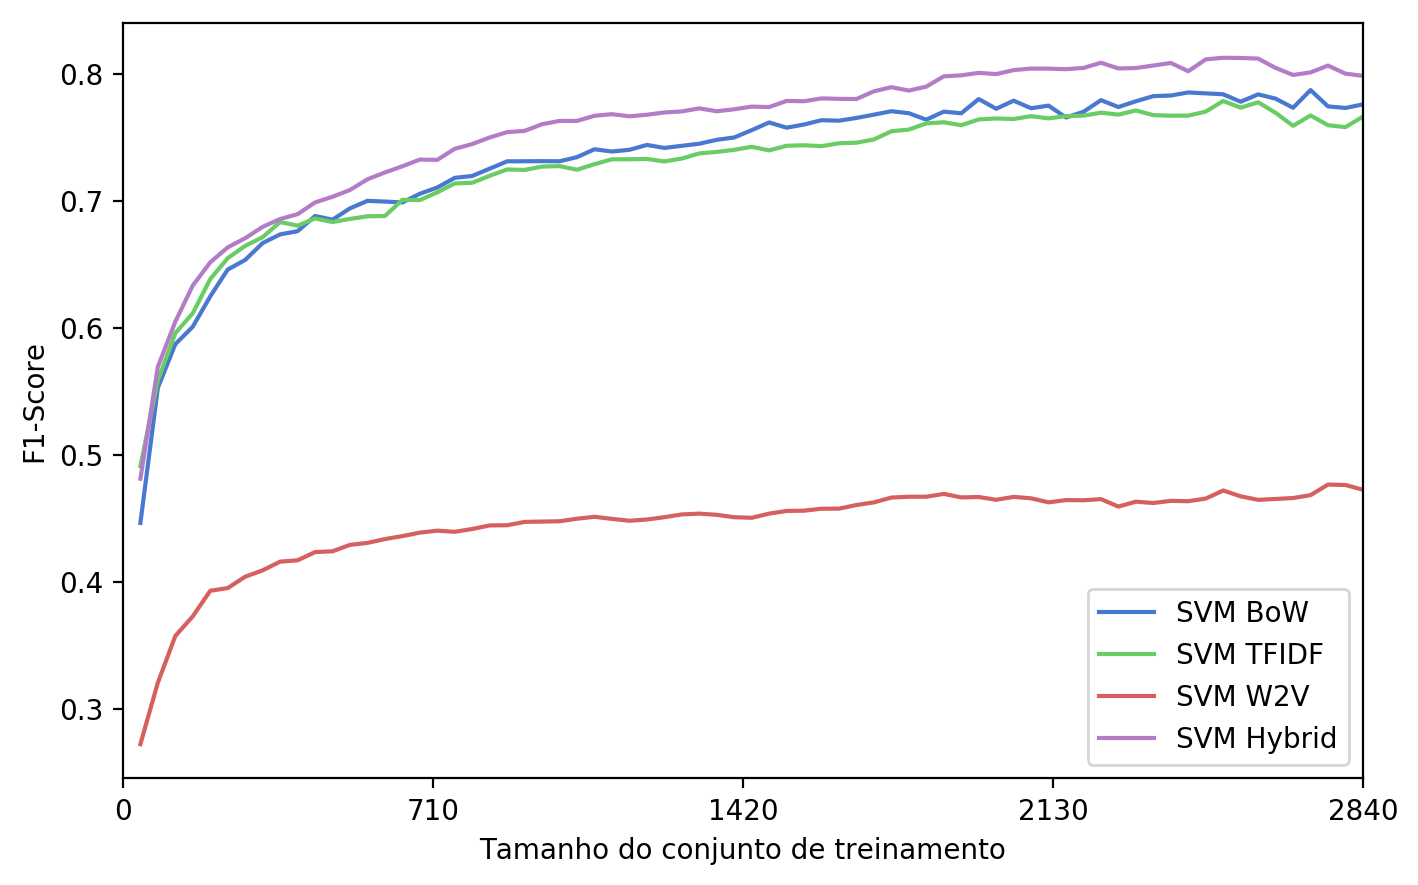

In [73]:
my_plot_(df, metric='f1', ylabel='F1-Score', path_save='qc_svm_3059_2112181600.eps')

In [ ]:
df

In [ ]:
df

In [ ]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


def my_plot(df, names=None):
    
    if names is None:
        names = df.Model.unique()
    
    num_results = len(names)
    
    aux = df[df.Model.map(lambda x: x in names)]
    
    
    sorterIndex = dict(zip(names, range(len(names))))
    aux['models_sort'] = aux['Model'].map(sorterIndex)
    aux.sort_values(['Model'], \
            ascending = [1], inplace = True)
    aux.drop('models_sort', 1, inplace = True)


    col_list = ["black", "black", "black", "black", "black"]
    col_list_palette = sns.xkcd_palette(col_list)
    #sns.set_palette(col_list_palette)
    sns.set_palette(sns.color_palette("muted", 5))


    #df = df.drop('accuracy', 1).drop('precision', 1).drop('recall', 1).drop('train_size', 1)

    plt.figure(figsize=(8, 4))
    
    print(df[df.Model.map(lambda x: x in names)])
    
    fig = sns.pointplot(x='train_size', y='f1', hue='Model', 
                        data=df[df.Model.map(lambda x: x in names)],
                        #markers=['o',7,'p','s','x'],
                        markers=['','','','',''],
                        lineheight=1,
                        scale=0.75
                       )

    for ind, label in enumerate(fig.get_xticklabels()):
        if ind == 0 or ind == 12 or ind == 26 or ind == 39 or ind == 52:
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.setp(fig.lines,linewidth=1.5)
    sns.set_context("notebook", font_scale=1.5)
    fig.set(ylabel="f1")
    fig.set(xlabel="Size of the training sample")
    fig.set(ylabel="F1-Score")


In [ ]:
my_plot(df)

In [ ]:
import pandas as pd


qc_lstm = pd.read_csv('lstm_results.csv')

qc_mlp_bow = pd.read_csv('mlp_bow_results.csv')

qc_mlp_hybrid = pd.read_csv('mlp_hybrid_results.csv')

qc_mlp_hybrid_b = pd.read_csv('mlp_hybridb_results.csv')

qc_tfidf = pd.read_csv('mlp_tfidf_results.csv')

qc_w2v = pd.read_csv('mlp_w2v_results.csv')

qc_nbbl = pd.read_csv('nbbl_all_results.csv')

qc_svm = pd.read_csv('qc_svm_results.csv')

qc_mlp = pd.concat([qc_mlp_bow, qc_tfidf, qc_w2v, qc_mlp_hybrid, qc_mlp_hybrid_b])

In [ ]:
my_plot(qc_lstm)

In [ ]:
my_plot(qc_mlp, names=['MLP BoW', 'MLP TFIDF', 'MLP W2V', 'MLP Hybrid'])

In [ ]:
plt.savefig('qc_mlp.eps', format='eps', dpi=100)

In [ ]:
r.to_csv('qc_mlp.csv')

In [ ]:
my_plot(qc_nbbl)

In [ ]:
my_plot(qc_svm)